In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("customer_booking.csv", encoding='latin-1')

In [6]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [7]:
df.shape

(50000, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [14]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [24]:

X = df.drop('booking_complete', axis=1)
y = df['booking_complete']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8541


In [26]:

from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Confusion Matrix:
 [[8335  185]
 [1274  206]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.53      0.14      0.22      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.56      0.57     10000
weighted avg       0.82      0.85      0.82     10000



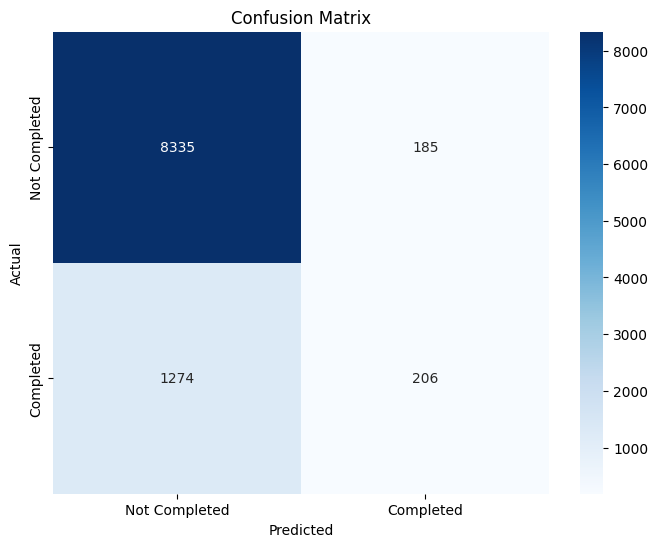

In [27]:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# prompt: Conduct a cross validation score of the above model

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.8494 0.7512 0.6774 0.5316 0.7683]
Average cross-validation score: 0.71558


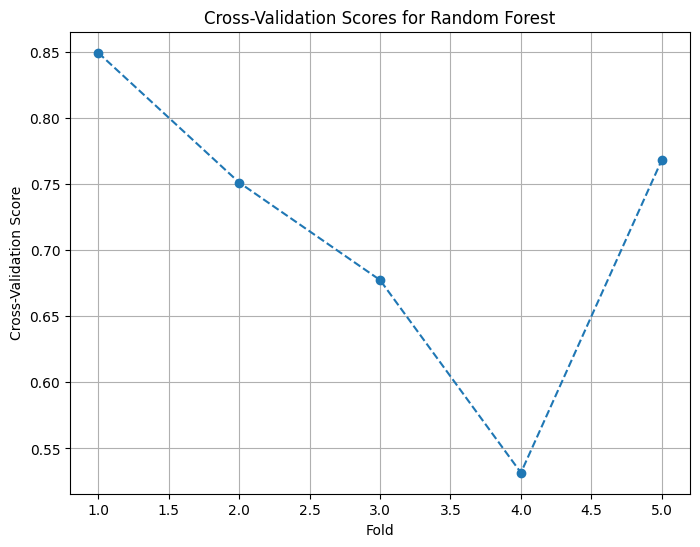

In [31]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o', linestyle='--')
plt.xlabel('Fold')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for Random Forest')
plt.grid(True)
plt.show()


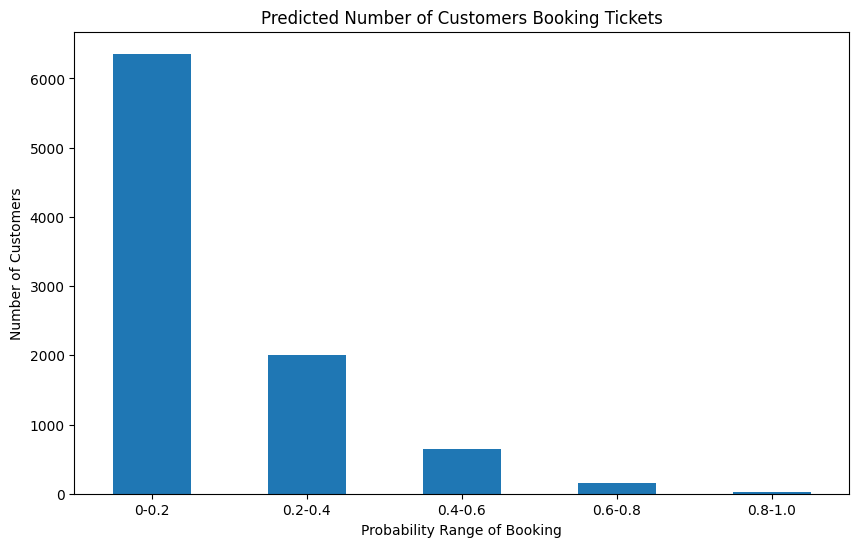

In [33]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
predictions_df = pd.DataFrame({'Probability of Booking': y_pred_proba})
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0']
predictions_df['Probability Range'] = pd.cut(predictions_df['Probability of Booking'], bins=bins, labels=labels)
booking_counts = predictions_df['Probability Range'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
booking_counts.plot(kind='bar')
plt.xlabel('Probability Range of Booking')
plt.ylabel('Number of Customers')
plt.title('Predicted Number of Customers Booking Tickets')
plt.xticks(rotation=0)
plt.show()


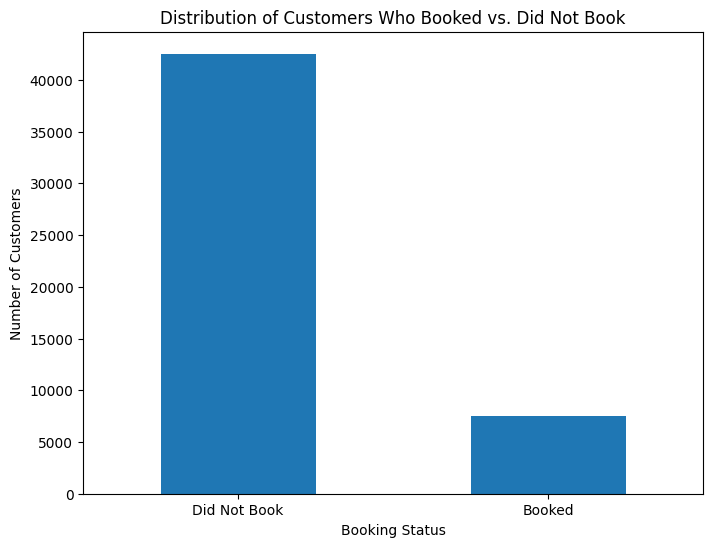

In [39]:
booking_counts = df['booking_complete'].value_counts()
plt.figure(figsize=(8, 6))
booking_counts.plot(kind='bar')
plt.xlabel('Booking Status')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Who Booked vs. Did Not Book')
plt.xticks([0, 1], ['Did Not Book', 'Booked'],rotation=0)
plt.show()
